In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


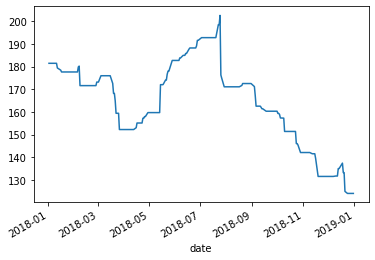

Text(0.5, 0, 'Difference')

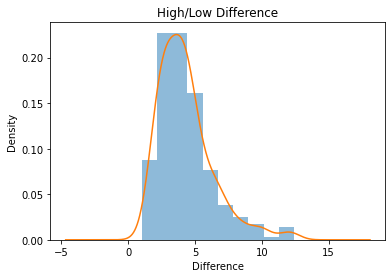

In [21]:
df_fb = pd.read_csv('data/fb_stock_prices_2018.csv',index_col='date',parse_dates=True)

df_fb.close.rolling('20D').min().plot()
plt.show()
df_fb = df_fb.assign(difference = lambda x: x.high - x.low)
ax = df_fb.difference.plot(kind='hist', density= True, alpha = 0.5)
#plt.xlabel('Difference')
df_fb.difference.plot(ax = ax, kind='kde',title='High/Low Difference')
plt.xlabel('Difference')

In [19]:
df_quakes = pd.read_csv('data/earthquakes.csv')


mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

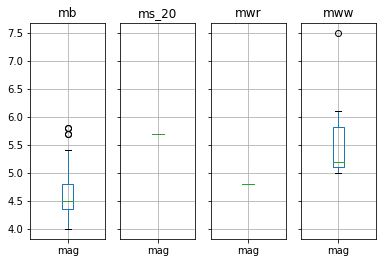

In [23]:
df_quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(layout=(1, 4))

<AxesSubplot:xlabel='date'>

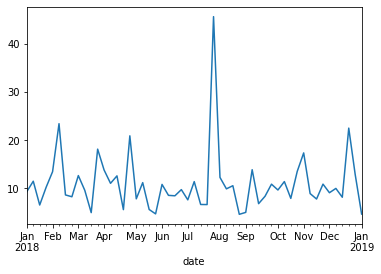

In [27]:
df_fb.resample('1W').agg(dict(high='max', low='min')).assign( max_change_weekly=lambda x: x.high - x.low).max_change_weekly.plot()

In [46]:
covid_df = pd.read_csv('data/covid19_cases.csv', index_col='dateRep', parse_dates=True).replace("United_States_of_America", 'USA')


<AxesSubplot:xlabel='dateRep'>

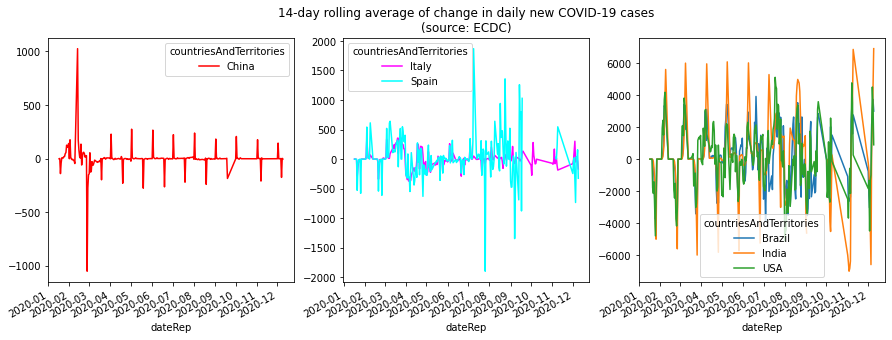

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases = covid_df.pivot_table(
    index=covid_df.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())

new_cases[['China']].plot(ax=axes[0], color='red')
new_cases[['Italy', 'Spain']].plot(
    ax=axes[1], color=['magenta', 'cyan'],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)
new_cases[['Brazil', 'India', 'USA']].plot(ax=axes[2])

<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

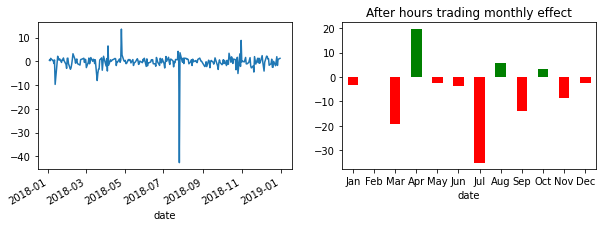

In [45]:
series = (df_fb.open - df_fb.close.shift())
monthly = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(ax=axes[0])

monthly.index = monthly.index.strftime('%b')
monthly.plot(ax=axes[1], kind='bar', title='After hours trading monthly effect', color=np.where(monthly >= 0, 'g', 'r'), rot=0)